In [1]:
pip install geopandas

     |████████████████████████████████| 1.0MB 4.6MB/s 
     |████████████████████████████████| 6.5MB 8.9MB/s 
     |████████████████████████████████| 14.8MB 180kB/s 


In [2]:
%matplotlib inline

import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [3]:
import requests
import json

wfs_url = "http://geo.ipisresearch.be/geoserver/public/ows"
params = dict(service='WFS', version='1.0.0', request='GetFeature',
              typeName='public:cod_mines_curated_all_opendata_p_ipis', outputFormat='json')

r = requests.get(wfs_url, params=params)
data_features = json.loads(r.content.decode('UTF-8'))
data_visits = geopandas.GeoDataFrame.from_features(data_features)

In [5]:
data_visits = geopandas.read_file('/content/cod_mines_curated_all_opendata_p_ipis.geojson')
data_visits.head(10)

,id,vid,source,project,pcode,name,visit_date,visit_onsite,visit_onsite_novisitreason,longitude,latitude,location_origin,province,province_old,territoire,collectivite,groupement,village,workers_numb,is_3t_mine,is_gold_mine,mineral1,selling_points_mineral1,final_destination_mineral1,mineral2,selling_points_mineral2,final_destination_mineral2,mineral3,selling_points_mineral3,final_destination_mineral3,mercury,presence,interference,armed_group1,type_armed_group1,frequency_armed_group1,taxation_armed_group1,commerce_taxation_armed_group1,entrance_taxation_armed_group1,monopoly_armed_group1,buying_minerals_armed_group1,digging_armed_group1,forced_labour_armed_group1,pillaging_armed_group1,armed_group2,type_armed_group2,frequency_armed_group2,taxation_armed_group2,commerce_taxation_armed_group2,entrance_taxation_armed_group2,monopoly_armed_group2,buying_minerals_armed_group2,digging_armed_group2,forced_labour_armed_group2,pillaging_armed_group2,state_service1,state_service2,state_service3,state_service4,itsci,qualification,geometry
0,cod_mines_curated_all_opendata_p_ipis.fid-11f0...,1,IPIS - Ministère des Mines,IPIS - 2009,codmine00191,Eohe,2009-01-01,1,None,28.712580,0.331880,GPS,Nord-Kivu,Nord-Kivu,Lubero,Bapere,Baredje,Maendeleo,300.0,0.0,1.0,Or,None,None,None,None,None,None,None,None,NaN,0.0,NaN,None,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,POINT (28.71258 0.33188)
1,cod_mines_curated_all_opendata_p_ipis.fid-11f0...,2,IPIS - Ministère des Mines,IPIS - 2009,codmine00192,Eita,2009-01-01,1,None,28.699160,0.321530,GPS,Nord-Kivu,Nord-Kivu,Lubero,Bapere,Baredje,Tembe,110.0,0.0,1.0,Or,None,None,None,None,None,None,None,None,NaN,0.0,NaN,None,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,POINT (28.69916 0.32153)
2,cod_mines_curated_all_opendata_p_ipis.fid-11f0...,3,IPIS - Ministère des Mines,IPIS - 2009,codmine00242,Mungu Iko,2009-01-01,1,None,28.185142,0.544992,GPS (Approximation),Nord-Kivu,Nord-Kivu,Lubero,Bapere,Bapaitumba,Ehoto,NaN,1.0,1.0,Or,None,None,Coltan,None,None,None,None,None,NaN,1.0,NaN,FARDC,FARDC - Pas de données sur les ingérences,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maï-Maï Simba,Groupe armé local,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,POINT (28.18514 0.54499)
3,cod_mines_curated_all_opendata_p_ipis.fid-11f0...,4,IPIS - Ministère des Mines,IPIS - 2009,codmine00260,Kiviri/Tayna,2009-01-01,1,None,28.884528,-0.352529,GPS,Nord-Kivu,Nord-Kivu,Lubero,Bamate,Luenge,Vunyakavulivwa,NaN,0.0,1.0,Or,None,None,Diamant,None,None,None,None,None,NaN,1.0,NaN,FDLR,Groupe armé étranger,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maï-Maï,Groupe armé local,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,POINT (28.88453 -0.35253)
4,cod_mines_curated_all_opendata_p_ipis.fid-11f0...,5,IPIS - Ministère des Mines,IPIS - 2009,codmine00272,Makanga,2009-01-01,1,None,28.903945,-0.036707,GPS,Nord-Kivu,Nord-Kivu,Lubero,Batangi,Musindi,Ngohi,NaN,0.0,1.0,Or,None,None,Diamant,None,None,None,None,None,NaN,1.0,NaN,FDLR,Groupe armé étranger,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,POINT (28.90395 -0.03671)
5,cod_mines_curated_all_opendata_p_ipis.fid-11f0...,6,IPIS - Ministère des Mines,IPIS - 2009,codmine00286,Maliyajama,2009-01-01,1,None,29.421061,0.864456,GPS,Nord-Kivu,Nord-Kivu,Beni,Beni-Mbau,Batangi-Mbau,Mamove,50.0,0.0,1.0,Or,None,None,None,None,None,None,None,None,NaN,0.0,NaN,None,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,POINT (29.42106 0.86446)
6,cod_mines_curated_all_opendata_p_ipis.fid-11f0...,7,IPIS - Ministère des Mines,IPIS - 2009,codmine00288,Mununze,2009-01-01,1,None,29.241830,0.595655,GPS,Nord-Kivu,Nord-Kivu,Beni,Beni-Mbau,Baswagha-Madiwe,Mununze,20.0,0.0,1.0,Or,None,None,None,None,None,None,None,None,NaN,0.0,NaN,None,0,None,NaN,

In [6]:
data_visits = data_visits[['vid', 'project', 'visit_date', 'name', 'pcode', 'workers_numb', 'interference', 'armed_group1', 'mineral1', 'geometry']]
data_visits.head()

,vid,project,visit_date,name,pcode,workers_numb,interference,armed_group1,mineral1,geometry
0,1,IPIS - 2009,2009-01-01,Eohe,codmine00191,300.0,NaN,None,Or,POINT (28.71258 0.33188)
1,2,IPIS - 2009,2009-01-01,Eita,codmine00192,110.0,NaN,None,Or,POINT (28.69916 0.32153)
2,3,IPIS - 2009,2009-01-01,Mungu Iko,codmine00242,NaN,NaN,FARDC,Or,POINT (28.18514 0.54499)
3,4,IPIS - 2009,2009-01-01,Kiviri/Tayna,codmine00260,NaN,NaN,FDLR,Or,POINT (28.88453 -0.35253)
4,5,IPIS - 2009,2009-01-01,Makanga,codmine00272,NaN,NaN,FDLR,Or,POINT (28.90395 -0.03671)


In [7]:
# Take only the data of visits by IPIS
data_ipis = data_visits[data_visits['project'].str.contains('IPIS') & (data_visits['workers_numb'] > 0)]
data_ipis

,vid,project,visit_date,name,pcode,workers_numb,interference,armed_group1,mineral1,geometry
0,1,IPIS - 2009,2009-01-01,Eohe,codmine00191,300.0,NaN,None,Or,POINT (28.71258 0.33188)
1,2,IPIS - 2009,2009-01-01,Eita,codmine00192,110.0,NaN,None,Or,POINT (28.69916 0.32153)
5,6,IPIS - 2009,2009-01-01,Maliyajama,codmine00286,50.0,NaN,None,Or,POINT (29.42106 0.86446)
6,7,IPIS - 2009,2009-01-01,Mununze,codmine00288,20.0,NaN,None,Or,POINT (29.24183 0.59566)
7,8,IPIS - 2009,2009-01-01,Kiboto,codmine00290,300.0,NaN,None,Or,POINT (29.09466 0.45922)
...,...,...,...,...,...,...,...,...,...,...
3682,3683,IPIS - IOM 2016-2018,2017-12-24,Kitumba /nyamitulano,codmine02992,60.0,1.0,Raïa Mutomboki,Cassitérite,POINT (27.59661 -2.33976)
3683,3684,IPIS - IOM 2016-2018,2017-12-26,Apemba,codmine02955,13.0,0.0,None,Or,POINT (29.09419 -3.84259)
3684,3685,IPIS - IOM 2016-2018,2017-12-27,Kisasa,codmine02201,100.0,0.0,None,Cassitérite,POINT (27.49673 -2.28790)
3685,3686,IPIS - IOM 2016-2018,2017-12-27,Kindikimozi,codmine02783,52.0,0.0,None,Cassitérite,POINT (27.46180 -2.27760)


In [8]:
# For those mining sites that were visited multiple times, take only the last visit
data_ipis_lastvisit = data_ipis.sort_values('visit_date').groupby('pcode', as_index=False).last()
data = geopandas.GeoDataFrame(data_ipis_lastvisit, crs=data_visits.crs)
data

,pcode,vid,project,visit_date,name,workers_numb,interference,armed_group1,mineral1,geometry
0,codmine00001,657,IPIS - PROMINES MoFA 2013-2014,2013-03-27,Mayi-Tatu,150.0,1.0,FARDC,Or,POINT (29.66033 1.01089)
1,codmine00002,658,IPIS - PROMINES MoFA 2013-2014,2013-03-27,Mabanga,115.0,1.0,FARDC,Or,POINT (29.65862 1.00308)
2,codmine00003,659,IPIS - PROMINES MoFA 2013-2014,2013-03-27,Molende,130.0,1.0,FARDC,Or,POINT (29.65629 0.98563)
3,codmine00004,660,IPIS - PROMINES MoFA 2013-2014,2013-03-27,Embouchure,135.0,1.0,FARDC,Or,POINT (29.64494 0.99976)
4,codmine00005,661,IPIS - PROMINES MoFA 2013-2014,2013-03-27,Apumu-Atandele-Jerusalem-Luka Yayo,270.0,1.0,FRPI,Or,POINT (29.66000 0.95600)
...,...,...,...,...,...,...,...,...,...,...
2146,codmine03000,3659,IPIS - IOM 2016-2018,2017-12-14,G4,150.0,0.0,FARDC,Cassitérite,POINT (27.57159 -2.31193)
2147,codmine03005,3570,IPIS - IOM 2016-2018,2017-08-28,Busonga,5.0,0.0,None,Coltan,POINT (29.08323 -1.98792)
2148,codmine03007,3571,IPIS - IOM 2016-2018,2017-08-28,Buterere/Jolie,15.0,0.0,None,Wolframite,POINT (29.08658 -1.99214)
2149,codmine03008,3574,IPIS - IOM 2016-2018,2017-08-30,Rusengasi,80.0,0.0,None,Cassitérite,POINT (29.05597 -2.24943)


In [9]:
protected_areas = geopandas.read_file('/content/drive/MyDrive/Conservation')

In [11]:
protected_areas.head()

,SCE_SEM,SCE_GEO,DATE_,ORIGINE,NOM,REGLEMENT,VALID,Statut,Shape_Leng,Categorie,TYPE_AP,TOPON_AP,NOM_AP,SOURCE_AP,ORIGINE_AP,PAYS_AP,Shape_Le_1,Shape_Area,TYPE2_AP,NAME_AP,Ordre,OID_,Sup_Admini,Sup_SIG,Texte,Réf_Juridi,Espèces,geometry
0,WWF/RDC,WWF/RDC,2007-04-18,GPS / Numérisation,Réserve de biosphère de la Luki,Réserve de biosphère,oui,Créé,133507.042122,0,Réserve de biosphère,Luki,Réserve de biosphere de la Luki,WWF/RDC,GPS / Numerisation,cod,133507.042122,3.105933e+04,Nature Reserve,Luki Biosphere Reserve,1,0,32968.0,3.105933e+04,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,None,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,"POLYGON ((1469015.469 -605537.842, 1469079.666..."
1,WWF/EARPO,WWF/EARPO,2007-04-18,GPS / Numérisation,Réserve naturelle d'Itombwe,Réserve naturelle,oui,Créé,726569.150601,0,Réserve naturelle,Itombwe,Réserve naturelle d'Itombwe,WWF/EARPO,GPS / Numerisation,cod,726569.150601,6.009095e+05,Nature Reserve,Itombwe Nature Reserve,2,0,605000.0,6.009095e+05,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,None,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,"POLYGON ((3132067.854 -408115.011, 3132021.543..."
2,SYGIAP,SYGIAP,2007-04-18,GPS / Numérisation,Réserve de faune à Okapis,Réserve naturelle,oui,Opérationnel,699413.460963,0,Réserve naturelle,Réserve de faune à Okapis,Réserve de faune à Okapis,SYGIAP,GPS / Numerisation,cod,699413.460963,1.384674e+06,Nature Reserve,Okapi Faunal Reserve,3,0,1372625.0,1.384674e+06,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,None,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,"POLYGON ((3197982.926 148235.506, 3202464.223 ..."
3,SYGIAP,SYGIAP,2007-04-18,GPS / Numérisation,Parc National de la Salonga,Parc National,oui,Opérationnel,994020.751122,0,Parc National,Salonga,Parc National de la Salonga,SYGIAP,GPS / Numerisation,cod,994020.751122,1.704580e+06,National park,Salonga National park,0,0,3600000.0,1.704580e+06,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,None,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,"POLYGON ((2384337.186 -280729.974, 2384339.382..."
4,SYGIAP,SYGIAP,2007-04-18,GPS / Numérisation,Parc National de la Salonga,Parc National,oui,Opérationnel,867943.914321,0,Parc National,Salonga,Parc National de la Salonga,SYGIAP,GPS / Numerisation,cod,867943.914321,1.612007e+06,National park,Salonga National park,0,0,0.0,1.612007e+06,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,None,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,"POLYGON ((2399938.984 -152211.494, 2399998.750..."


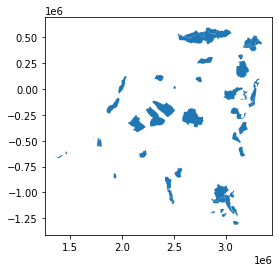

In [10]:
protected_areas.plot()

BOTH HAVE DIFFERENT COORDINATE SYSTEM REFERENCES

In [12]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
protected_areas.crs

<Projected CRS: PROJCS["RDC_Mercator",GEOGCS["GCS_WGS_1984",DATUM[ ...>
Name: RDC_Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Mercator (variant B)
Datum: World Geodetic System 1984
- Ellipsoid: WGS_84
- Prime Meridian: Greenwich

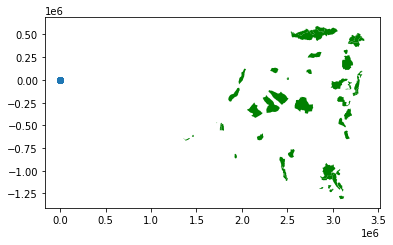

In [15]:
ax = data.plot()
protected_areas.plot(ax = ax, color = 'green')

In [19]:
from shapely.geometry import Point

In [20]:
goma = Point(29.22,1.66)

distance command will give the distances of all point in the dataset from goma

In [22]:
data.distance(goma).sort_values()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


1905     0.380617
1902     0.381322
1952     0.383632
1954     0.390409
1951     0.391089
          ...    
1129    11.633972
1097    11.640245
1173    11.646949
1068    11.670249
1168    11.686445
Length: 2151, dtype: float64

converting data to given crs

In [31]:
data_utm = data.to_crs(epsg = 32735).head()
data_utm

,pcode,vid,project,visit_date,name,workers_numb,interference,armed_group1,mineral1,geometry
0,codmine00001,657,IPIS - PROMINES MoFA 2013-2014,2013-03-27,Mayi-Tatu,150.0,1.0,FARDC,Or,POINT (796089.416 10111855.174)
1,codmine00002,658,IPIS - PROMINES MoFA 2013-2014,2013-03-27,Mabanga,115.0,1.0,FARDC,Or,POINT (795899.664 10110990.840)
2,codmine00003,659,IPIS - PROMINES MoFA 2013-2014,2013-03-27,Molende,130.0,1.0,FARDC,Or,POINT (795641.707 10109059.787)
3,codmine00004,660,IPIS - PROMINES MoFA 2013-2014,2013-03-27,Embouchure,135.0,1.0,FARDC,Or,POINT (794376.309 10110622.250)
4,codmine00005,661,IPIS - PROMINES MoFA 2013-2014,2013-03-27,Apumu-Atandele-Jerusalem-Luka Yayo,270.0,1.0,FRPI,Or,POINT (796057.504 10105781.548)


In [32]:
protected_areas_utm = protected_areas.to_crs(epsg = '32735').head()
protected_areas_utm

,SCE_SEM,SCE_GEO,DATE_,ORIGINE,NOM,REGLEMENT,VALID,Statut,Shape_Leng,Categorie,TYPE_AP,TOPON_AP,NOM_AP,SOURCE_AP,ORIGINE_AP,PAYS_AP,Shape_Le_1,Shape_Area,TYPE2_AP,NAME_AP,Ordre,OID_,Sup_Admini,Sup_SIG,Texte,Réf_Juridi,Espèces,geometry
0,WWF/RDC,WWF/RDC,2007-04-18,GPS / Numérisation,Réserve de biosphère de la Luki,Réserve de biosphère,oui,Créé,133507.042122,0,Réserve de biosphère,Luki,Réserve de biosphere de la Luki,WWF/RDC,GPS / Numerisation,cod,133507.042122,3.105933e+04,Nature Reserve,Luki Biosphere Reserve,1,0,32968.0,3.105933e+04,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,None,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,"POLYGON ((-1038121.473 9375412.190, -1038053.9..."
1,WWF/EARPO,WWF/EARPO,2007-04-18,GPS / Numérisation,Réserve naturelle d'Itombwe,Réserve naturelle,oui,Créé,726569.150601,0,Réserve naturelle,Itombwe,Réserve naturelle d'Itombwe,WWF/EARPO,GPS / Numerisation,cod,726569.150601,6.009095e+05,Nature Reserve,Itombwe Nature Reserve,2,0,605000.0,6.009095e+05,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,None,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,"POLYGON ((637994.488 9590686.863, 637948.840 9..."
2,SYGIAP,SYGIAP,2007-04-18,GPS / Numérisation,Réserve de faune à Okapis,Réserve naturelle,oui,Opérationnel,699413.460963,0,Réserve naturelle,Réserve de faune à Okapis,Réserve de faune à Okapis,SYGIAP,GPS / Numerisation,cod,699413.460963,1.384674e+06,Nature Reserve,Okapi Faunal Reserve,3,0,1372625.0,1.384674e+06,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,None,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,"POLYGON ((704388.260 10148801.817, 708890.818 ..."
3,SYGIAP,SYGIAP,2007-04-18,GPS / Numérisation,Parc National de la Salonga,Parc National,oui,Opérationnel,994020.751122,0,Parc National,Salonga,Parc National de la Salonga,SYGIAP,GPS / Numerisation,cod,994020.751122,1.704580e+06,National park,Salonga National park,0,0,3600000.0,1.704580e+06,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,None,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,"POLYGON ((-112340.105 9717100.363, -112337.911..."
4,SYGIAP,SYGIAP,2007-04-18,GPS / Numérisation,Parc National de la Salonga,Parc National,oui,Opérationnel,867943.914321,0,Parc National,Salonga,Parc National de la Salonga,SYGIAP,GPS / Numerisation,cod,867943.914321,1.612007e+06,National park,Salonga National park,0,0,0.0,1.612007e+06,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,None,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,"POLYGON ((-97046.374 9846612.024, -96986.183 9..."


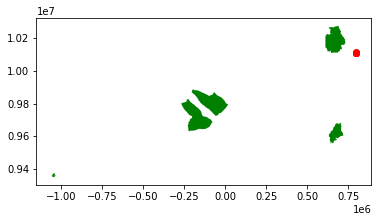

In [34]:
ax = data_utm.plot(color = 'red')
protected_areas_utm.plot(ax = ax, color = 'green')